In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("LoanStats3d.csv",skiprows=1)
df.info()

/Volumes/Data/Code/streambright/bootcamp/py2-env/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(85), object(26)
memory usage: 356.6+ MB


In [3]:
df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68615044,73517819.0,16000.0,16000.0,16000.0,60 months,13.99%,372.21,C,C4,...,0.0,0.0,73.7,25.0,0.0,2.0,704224.0,112166.0,5100.0,124120.0
1,68466066,73355870.0,20200.0,20200.0,20200.0,60 months,18.49%,518.35,D,D5,...,0.0,4.0,100.0,25.0,1.0,0.0,84627.0,43224.0,17800.0,64227.0
2,68565856,73455664.0,9000.0,9000.0,9000.0,36 months,9.17%,286.92,B,B2,...,0.0,1.0,100.0,33.3,0.0,0.0,69818.0,14118.0,15500.0,16318.0
3,68597047,73486873.0,19000.0,19000.0,19000.0,60 months,14.85%,450.52,C,C5,...,0.0,4.0,94.1,100.0,0.0,0.0,94620.0,48159.0,7500.0,36720.0
4,68356421,73246236.0,22400.0,22400.0,22400.0,60 months,12.88%,508.30,C,C2,...,0.0,3.0,97.0,25.0,0.0,0.0,436841.0,184356.0,21000.0,191682.0


In [6]:
# .ix[row slice, column slice] 
df.ix[:5,:10]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade
0,68615044,73517819.0,16000.0,16000.0,16000.0,60 months,13.99%,372.21,C,C4
1,68466066,73355870.0,20200.0,20200.0,20200.0,60 months,18.49%,518.35,D,D5
2,68565856,73455664.0,9000.0,9000.0,9000.0,36 months,9.17%,286.92,B,B2
3,68597047,73486873.0,19000.0,19000.0,19000.0,60 months,14.85%,450.52,C,C5
4,68356421,73246236.0,22400.0,22400.0,22400.0,60 months,12.88%,508.30,C,C2
5,68416256,73306061.0,5000.0,5000.0,5000.0,36 months,9.80%,160.87,B,B3


In [7]:
df.drop(['id','member_id'],1, inplace=True)

In [8]:
df.int_rate = pd.Series(df.int_rate).str.replace('%', '').astype(float)
df.ix[:4,:7]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade
0,16000.0,16000.0,16000.0,60 months,13.99,372.21,C
1,20200.0,20200.0,20200.0,60 months,18.49,518.35,D
2,9000.0,9000.0,9000.0,36 months,9.17,286.92,B
3,19000.0,19000.0,19000.0,60 months,14.85,450.52,C
4,22400.0,22400.0,22400.0,60 months,12.88,508.30,C


In [14]:
df.ix[:4,:7]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade
0,16000.0,16000.0,16000.0,60 months,13.99,372.21,C
1,20200.0,20200.0,20200.0,60 months,18.49,518.35,D
2,9000.0,9000.0,9000.0,36 months,9.17,286.92,B
3,19000.0,19000.0,19000.0,60 months,14.85,450.52,C
4,22400.0,22400.0,22400.0,60 months,12.88,508.30,C


In [9]:
print (df.loan_amnt != df.funded_amnt).value_counts()

False    421095
True          2
dtype: int64


In [20]:
df = df.ix[:421094,:]

In [21]:
df.ix[:5,8:15]

,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status
0,Registered Nurse,9 years,MORTGAGE,142000.0,Verified,Dec-2015,Current
1,Manager,4 years,RENT,60000.0,Source Verified,Dec-2015,Current
2,Truck Driver,1 year,OWN,50000.0,Not Verified,Dec-2015,Current
3,Application Analyst,9 years,OWN,75000.0,Not Verified,Dec-2015,Current
4,Executive Director,6 years,MORTGAGE,95000.0,Not Verified,Dec-2015,Current
5,Accounts Payable Manager,6 years,OWN,72000.0,Not Verified,Dec-2015,Current


In [22]:
print df.emp_title.value_counts().head()
print df.emp_title.value_counts().tail()
df.emp_title.unique().shape

Teacher             8070
Manager             6802
Owner               3849
Registered Nurse    3209
RN                  3151
Name: emp_title, dtype: int64
Broadcast supervisor      1
mini computer operator    1
operations clerk          1
System Administrator 7    1
Business Service Tech     1
Name: emp_title, dtype: int64


(120813,)

In [23]:
df.drop(['emp_title'],1, inplace=True)

In [24]:
df.emp_length.value_counts()

10+ years    141521
2 years       37497
< 1 year      34340
3 years       33430
1 year        27473
5 years       24930
4 years       24506
n/a           23817
8 years       21560
7 years       18414
6 years       16838
9 years       16769
Name: emp_length, dtype: int64

In [25]:
df.replace('n/a', np.nan,inplace=True)
df.emp_length.fillna(value=0,inplace=True)
df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df['emp_length'] = df['emp_length'].astype(int)

In [32]:
df = df[(df.emp_length != 0)]

(397278, 108)

In [33]:
df.emp_length.value_counts()

10    141521
1      61813
2      37497
3      33430
5      24930
4      24506
0      23817
8      21560
7      18414
6      16838
9      16769
Name: emp_length, dtype: int64

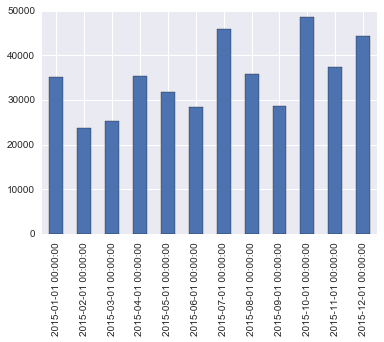

In [36]:
issue_d_todate = pd.to_datetime(df.issue_d)
df.issue_d = pd.Series(df.issue_d).str.replace('-2015', '')
issue_d_todate.value_counts().sort_index().plot(kind='bar')

In [37]:
df.drop(['loan_status'],1, inplace=True)

ValueError: labels ['loan_status'] not contained in axis

In [38]:
df.ix[:5,12:21]

,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti
0,Dec,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,945xx,CA,17.74
1,Dec,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,958xx,CA,34.84
2,Dec,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,670xx,KS,11.98
3,Dec,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,112xx,NY,13.09
4,Dec,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,290xx,SC,22.98
5,Dec,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,280xx,NC,6.52


In [39]:
print df.purpose.value_counts()
print ''
print df.title.value_counts().tail()

debt_consolidation    250020
credit_card           102025
home_improvement       25293
other                  19204
major_purchase          7449
medical                 3938
car                     3466
small_business          3364
moving                  2420
vacation                2249
house                   1438
renewable_energy         224
wedding                    4
educational                1
Name: purpose, dtype: int64

Learning and training                      1
Credit Card/Auto Repair                    1
Trying to come back to reality!            1
Paying off higher interest cards & auto    1
DebtC                                      1
Name: title, dtype: int64


In [40]:
df.drop(['pymnt_plan','url','desc','title' ],1, inplace=True)

In [41]:
df.ix[:5,17:25]

,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal
0,2.0,Oct-2004,2.0,8.0,39.0,15.0,2.0,2273.0
1,0.0,Jun-2004,0.0,NaN,86.0,10.0,1.0,8284.0
2,0.0,Jun-2001,2.0,NaN,NaN,5.0,0.0,7518.0
3,0.0,Jun-2000,2.0,63.0,NaN,15.0,0.0,17771.0
4,0.0,Apr-1995,0.0,54.0,NaN,16.0,0.0,13028.0
5,0.0,Jan-2002,0.0,NaN,89.0,11.0,1.0,4838.0


In [42]:
df.delinq_2yrs.value_counts()

0.0     334008
1.0      57000
2.0      17241
3.0       6293
4.0       2949
5.0       1475
6.0        842
7.0        438
8.0        284
9.0        173
10.0       127
11.0        80
12.0        51
13.0        39
14.0        37
15.0        21
16.0        12
17.0         7
18.0         5
19.0         5
20.0         2
26.0         2
30.0         1
22.0         1
27.0         1
39.0         1
Name: delinq_2yrs, dtype: int64

In [43]:
from datetime import datetime

df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line)

df.earliest_cr_line = pd.datetime.now().date() - df.earliest_cr_line

In [44]:
df.earliest_cr_line

0         4314 days
1         4436 days
2         5532 days
3         5897 days
4         7785 days
5         5318 days
6         6445 days
7         5014 days
8         2031 days
9         3402 days
10        3614 days
11        3737 days
12        7510 days
13        4467 days
14        5502 days
15        5805 days
16        4071 days
17        7358 days
18        5198 days
19        5075 days
20        7997 days
21        2457 days
22       10463 days
23        5836 days
24        3341 days
25        9611 days
26        6993 days
27        5624 days
28        5563 days
29       10401 days
            ...    
421065    9489 days
421066    6720 days
421067    5106 days
421068    7358 days
421069    7906 days
421070    5137 days
421071    8454 days
421072    5532 days
421073   10066 days
421074    4833 days
421075   12046 days
421076    4833 days
421077    4710 days
421078    7967 days
421079    3553 days
421080    5989 days
421081    3584 days
421082    2000 days
421083    8120 days


In [45]:
df.ix[:5,23:32]

,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv
0,2.0,2273.0,39.9%,19.0,w,15436.45,15436.45,1085.54,1085.54
1,1.0,8284.0,40.6%,16.0,w,19569.07,19569.07,1503.18,1503.18
2,0.0,7518.0,48.5%,11.0,w,8333.50,8333.50,856.35,856.35
3,0.0,17771.0,63.7%,34.0,w,13329.29,13329.29,6312.37,6312.37
4,0.0,13028.0,32.7%,35.0,w,21587.72,21587.72,1484.83,1484.83
5,1.0,4838.0,56.3%,20.0,f,4636.94,4636.94,475.80,475.80


In [46]:
df.revol_util = pd.Series(df.revol_util).str.replace('%', '').astype(float)

In [47]:
df.ix[:5,28:38]

,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d
0,15436.45,15436.45,1085.54,1085.54,563.55,521.99,0.0,0.0,0.0,Apr-2016
1,19569.07,19569.07,1503.18,1503.18,630.93,872.25,0.0,0.0,0.0,Apr-2016
2,8333.50,8333.50,856.35,856.35,666.50,189.85,0.0,0.0,0.0,Apr-2016
3,13329.29,13329.29,6312.37,6312.37,5670.71,641.66,0.0,0.0,0.0,Apr-2016
4,21587.72,21587.72,1484.83,1484.83,812.28,672.55,0.0,0.0,0.0,Apr-2016
5,4636.94,4636.94,475.80,475.80,363.06,112.74,0.0,0.0,0.0,Apr-2016


In [48]:
df.drop(['out_prncp','out_prncp_inv','total_pymnt',
         'total_pymnt_inv','total_rec_prncp'] ,1, inplace=True)

In [49]:
df.drop(['last_pymnt_d','last_pymnt_amnt',
         'next_pymnt_d','last_credit_pull_d'],1, inplace=True)

In [50]:
df.ix[:5,30:40]

,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq
0,0.0,0.0,0.0,43.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0
1,0.0,0.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0
2,0.0,0.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0
3,0.0,0.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0
4,0.0,0.0,0.0,54.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0
5,0.0,0.0,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0


In [51]:
print df.columns
print df.head(1).values
df.info()

Index([u'loan_amnt', u'funded_amnt', u'funded_amnt_inv', u'term', u'int_rate',
       u'installment', u'grade', u'sub_grade', u'emp_length',
       u'home_ownership', u'annual_inc', u'verification_status', u'issue_d',
       u'purpose', u'zip_code', u'addr_state', u'dti', u'delinq_2yrs',
       u'earliest_cr_line', u'inq_last_6mths', u'mths_since_last_delinq',
       u'mths_since_last_record', u'open_acc', u'pub_rec', u'revol_bal',
       u'revol_util', u'total_acc', u'initial_list_status', u'total_rec_int',
       u'total_rec_late_fee', u'recoveries', u'collection_recovery_fee',
       u'collections_12_mths_ex_med', u'mths_since_last_major_derog',
       u'policy_code', u'application_type', u'annual_inc_joint', u'dti_joint',
       u'verification_status_joint', u'acc_now_delinq', u'tot_coll_amt',
       u'tot_cur_bal', u'open_acc_6m', u'open_il_6m', u'open_il_12m',
       u'open_il_24m', u'mths_since_rcnt_il', u'total_bal_il', u'il_util',
       u'open_rv_12m', u'open_rv_24m', u'max_b

In [52]:
df.drop(['grade','sub_grade',
         'initial_list_status','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee'],1, inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421095 entries, 0 to 421094
Data columns (total 87 columns):
loan_amnt                         421095 non-null float64
funded_amnt                       421095 non-null float64
funded_amnt_inv                   421095 non-null float64
term                              421095 non-null object
int_rate                          421095 non-null float64
installment                       421095 non-null float64
emp_length                        421095 non-null int64
home_ownership                    421095 non-null object
annual_inc                        421095 non-null float64
verification_status               421095 non-null object
issue_d                           421095 non-null object
purpose                           421095 non-null object
zip_code                          421095 non-null object
addr_state                        421095 non-null object
dti                               421095 non-null float64
delinq_2yrs                 

In [56]:
df.columns

Index([u'loan_amnt', u'funded_amnt', u'funded_amnt_inv', u'term', u'int_rate',
       u'installment', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'issue_d', u'purpose', u'zip_code',
       u'addr_state', u'dti', u'delinq_2yrs', u'earliest_cr_line',
       u'inq_last_6mths', u'mths_since_last_delinq', u'mths_since_last_record',
       u'open_acc', u'pub_rec', u'revol_bal', u'revol_util', u'total_acc',
       u'collections_12_mths_ex_med', u'mths_since_last_major_derog',
       u'policy_code', u'application_type', u'annual_inc_joint', u'dti_joint',
       u'verification_status_joint', u'acc_now_delinq', u'tot_coll_amt',
       u'tot_cur_bal', u'open_acc_6m', u'open_il_6m', u'open_il_12m',
       u'open_il_24m', u'mths_since_rcnt_il', u'total_bal_il', u'il_util',
       u'open_rv_12m', u'open_rv_24m', u'max_bal_bc', u'all_util',
       u'total_rev_hi_lim', u'inq_fi', u'total_cu_tl', u'inq_last_12m',
       u'acc_open_past_24mths', u'avg_cur_bal', u'bc_

In [59]:
keepers = ['loan_amnt', 'int_rate', 'emp_length', 'annual_inc', 'delinq_2yrs', 'earliest_cr_line', 'total_acc', 'total_bal_ex_mort']

In [61]:
df[keepers].describe()

,loan_amnt,int_rate,emp_length,annual_inc,delinq_2yrs,earliest_cr_line,total_acc,total_bal_ex_mort
count,421095.000000,421095.000000,421095.000000,4.210950e+05,421095.000000,421095,421095.000000,4.210950e+05
mean,15240.285862,12.601235,5.766651,7.696561e+04,0.347397,6523 days 18:02:08.185801,25.493468,5.222199e+04
std,8571.325901,4.318018,3.750589,7.394996e+04,0.927695,2779 days 19:45:54.105205,12.097200,4.907494e+04
min,1000.000000,5.320000,0.000000,0.000000e+00,0.000000,1361 days 00:00:00,4.000000,0.000000e+00
25%,8500.000000,9.170000,2.000000,4.600000e+04,0.000000,4619 days 00:00:00,17.000000,2.259850e+04
50%,14000.000000,12.290000,6.000000,6.500000e+04,0.000000,5958 days 00:00:00,24.000000,3.959600e+04
75%,20000.000000,15.590000,10.000000,9.169050e+04,0.000000,7967 days 00:00:00,32.000000,6.565100e+04
max,35000.000000,28.990000,10.000000,9.500000e+06,39.000000,26503 days 00:00:00,169.000000,2.921551e+06


In [88]:
df.earliest_cr_line = df.earliest_cr_line.astype('timedelta64[D]').astype(int)

In [90]:
df[keepers].head()

,loan_amnt,int_rate,emp_length,annual_inc,delinq_2yrs,earliest_cr_line,total_acc,total_bal_ex_mort
0,16000.0,13.99,9,142000.0,2.0,4314,19.0,112166.0
1,20200.0,18.49,4,60000.0,0.0,4436,16.0,43224.0
2,9000.0,9.17,1,50000.0,0.0,5532,11.0,14118.0
3,19000.0,14.85,9,75000.0,0.0,5897,34.0,48159.0
4,22400.0,12.88,6,95000.0,0.0,7785,35.0,184356.0


In [91]:
keep = df[keepers].sample(n=20000, replace=False)

In [92]:
keep.to_csv("lending_club.csv")